# Airbnb Pricing 
this notebook is used to create a model that predicts the price of an airbnb listing 

## Get the Data

In [ ]:
import pandas as pd

In [6]:
data = pd.read_csv('/Users/mordechaichabot/Downloads/listings (1).csv')

In [7]:
data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20201210194816,2020-12-11,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,10.0,10.0,9.0,NaN,f,2,2,0,0,0.36
1,3831,https://www.airbnb.com/rooms/3831,20201210194816,2020-12-11,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,...,9.0,10.0,10.0,NaN,f,1,1,0,0,4.97
2,5121,https://www.airbnb.com/rooms/5121,20201210194816,2020-12-11,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,10.0,9.0,9.0,NaN,f,1,0,1,0,0.36
3,5178,https://www.airbnb.com/rooms/5178,20201210194816,2020-12-11,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,9.0,10.0,9.0,NaN,f,1,0,1,0,3.36
4,5203,https://www.airbnb.com/rooms/5203,20201210194816,2020-12-11,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,https://a0.muscache.com/pictures/103776/b37157...,7490,https://www.airbnb.com/users/show/7490,...,10.0,10.0,10.0,NaN,f,1,0,1,0,0.86


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36923 entries, 0 to 36922
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36923 non-null  int64  
 1   listing_url                                   36923 non-null  object 
 2   scrape_id                                     36923 non-null  int64  
 3   last_scraped                                  36923 non-null  object 
 4   name                                          36910 non-null  object 
 5   description                                   35829 non-null  object 
 6   neighborhood_overview                         23446 non-null  object 
 7   picture_url                                   36923 non-null  object 
 8   host_id                                       36923 non-null  int64  
 9   host_url                                      36923 non-null 

In [13]:
main_columns = ['accommodates','room_type','neighbourhood_group_cleansed',
               'host_listings_count','price','number_of_reviews',
               'review_scores_rating']

In [15]:
airbnb_data = data[main_columns]

In [17]:
airbnb_data.head()

,accommodates,room_type,neighbourhood_group_cleansed,host_listings_count,price,number_of_reviews,review_scores_rating
0,2,Entire home/apt,Manhattan,6.0,$175.00,48,94.0
1,3,Entire home/apt,Brooklyn,1.0,$74.00,375,89.0
2,2,Private room,Brooklyn,1.0,$60.00,50,90.0
3,2,Private room,Manhattan,1.0,$65.00,474,84.0
4,1,Private room,Manhattan,1.0,$75.00,118,98.0


In [18]:
airbnb_data['price'] = airbnb_data['price'].str.replace('$','',regex=True)
airbnb_data['price'] = airbnb_data['price'].str.replace(',','',regex=True)

airbnb_data['price'] = pd.to_numeric(airbnb_data['price'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [19]:
airbnb_data['room_type'].value_counts()

Entire home/apt    19470
Private room       16478
Shared room          678
Hotel room           297
Name: room_type, dtype: int64

In [20]:
airbnb_data['neighbourhood_group_cleansed'].value_counts()

Manhattan        16642
Brooklyn         14439
Queens            4629
Bronx              937
Staten Island      276
Name: neighbourhood_group_cleansed, dtype: int64

In [21]:
airbnb_data.describe()


,accommodates,host_listings_count,price,number_of_reviews,review_scores_rating
count,36923.000000,36914.000000,36923.000000,36923.000000,26815.000000
mean,2.806245,20.812700,145.921191,23.182298,93.812903
std,1.849797,138.766822,268.388199,48.066110,9.521463
min,0.000000,0.000000,0.000000,0.000000,20.000000
25%,2.000000,1.000000,61.000000,0.000000,92.000000
50%,2.000000,1.000000,100.000000,4.000000,97.000000
75%,4.000000,2.000000,159.000000,21.000000,100.000000
max,16.000000,2470.000000,10000.000000,748.000000,100.000000


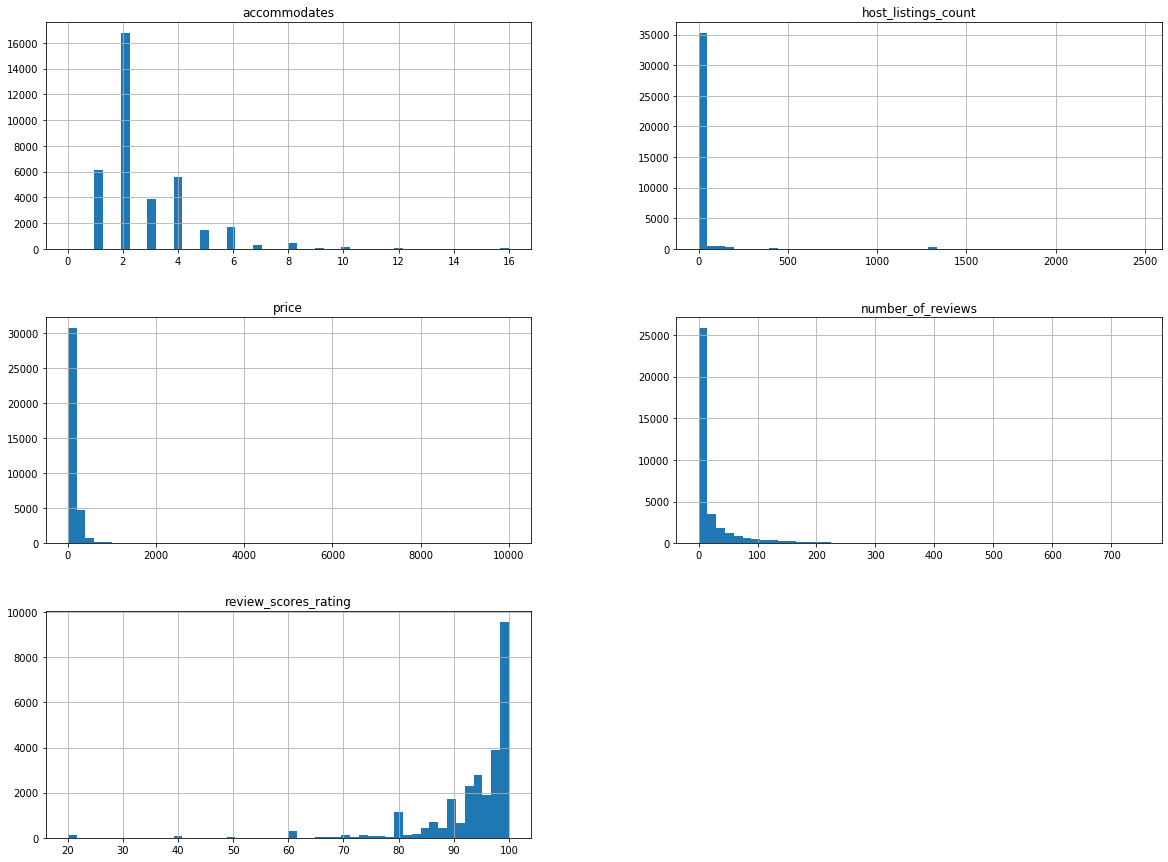

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
airbnb_data.hist(bins=50, figsize=(20,15))
plt.show()

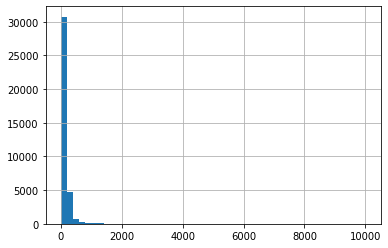

In [23]:
airbnb_data['price'].hist(bins=50)

the range of prices seems very high, so i will remove all listings that charge more then 1000 dollars a night and remove all listings that cost less then 10 dollars

In [24]:
airbnb_data = airbnb_data[airbnb_data['price']>10]
airbnb_data = airbnb_data[airbnb_data['price']<1000]


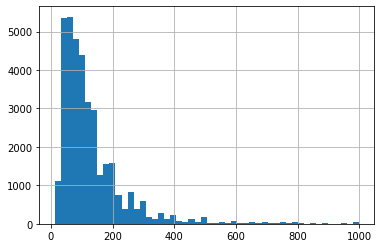

In [25]:
airbnb_data['price'].hist(bins=50)

split the data into train set and test set

In [26]:

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(airbnb_data, test_size=0.2, random_state=42)

## Data understanding 

In [27]:
data = train_set.copy()


In [28]:
data.head()

,accommodates,room_type,neighbourhood_group_cleansed,host_listings_count,price,number_of_reviews,review_scores_rating
3419,4,Entire home/apt,Manhattan,1.0,200.0,16,95.0
15239,2,Private room,Brooklyn,3.0,75.0,15,100.0
4010,2,Entire home/apt,Manhattan,1.0,200.0,23,93.0
35538,2,Entire home/apt,Manhattan,0.0,155.0,0,NaN
13843,2,Private room,Queens,1.0,75.0,13,98.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f878bccb190>,
      dtype=object)

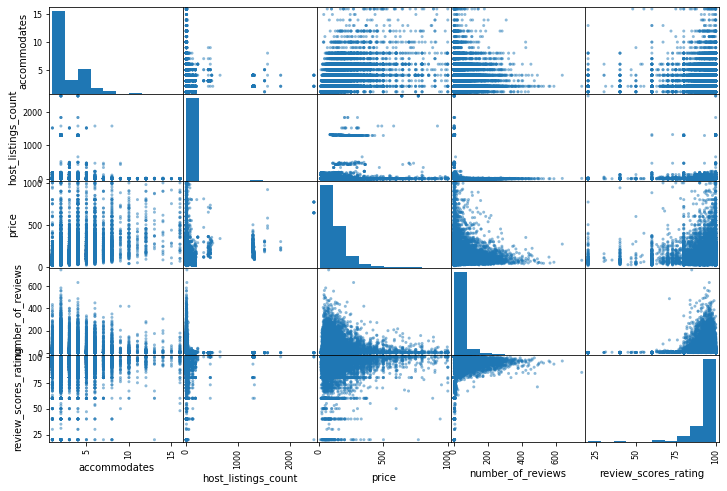

In [29]:
from pandas.plotting import scatter_matrix

scatter_matrix(data, figsize=(12, 8))


In [30]:
corr_matrix = data.corr()
corr_matrix["price"].sort_values(ascending=False)

price                   1.000000
accommodates            0.501181
host_listings_count     0.124320
review_scores_rating    0.056136
number_of_reviews      -0.046660
Name: price, dtype: float64

seems like accommodates (how many people can be accomodated in a listing) is correlated to the price of the listing which makes sense

## Prep data for ML models
have to normalize the data and make sure that all the catagorical data is encoded 

In [31]:
airbnb_data = train_set.drop('price',axis=1)
airbnb_data_labels = train_set['price'].copy()

In [32]:
airbnb_data.head()

,accommodates,room_type,neighbourhood_group_cleansed,host_listings_count,number_of_reviews,review_scores_rating
3419,4,Entire home/apt,Manhattan,1.0,16,95.0
15239,2,Private room,Brooklyn,3.0,15,100.0
4010,2,Entire home/apt,Manhattan,1.0,23,93.0
35538,2,Entire home/apt,Manhattan,0.0,0,NaN
13843,2,Private room,Queens,1.0,13,98.0


In [34]:
airbnb_data_num = airbnb_data.drop(["room_type",'neighbourhood_group_cleansed'], axis=1)
airbnb_data_cat = airbnb_data[["room_type",'neighbourhood_group_cleansed']]

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

airbnb_data_num_tr = num_pipeline.fit_transform(airbnb_data_num)

In [37]:
airbnb_data_num_tr

array([[ 0.68404181, -0.14171692, -0.1559629 ,  0.03917656],
       [-0.43785956, -0.12742525, -0.17645726,  0.6485528 ],
       [-0.43785956, -0.14171692, -0.0125024 , -0.20457393],
       ...,
       [-0.43785956, -0.10598775,  2.50830354,  0.03917656],
       [-0.43785956, -0.14171692,  0.11046375, -0.81395016],
       [ 0.12309112, -0.13457109,  0.31540732,  0.03917656]])

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


num_attribs = list(airbnb_data_num.columns)
cat_attribs = list(airbnb_data_cat.columns)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

airbnb_data_prepared = full_pipeline.fit_transform(airbnb_data)

In [40]:
airbnb_data_prepared

array([[ 0.68404181, -0.14171692, -0.1559629 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.43785956, -0.12742525, -0.17645726, ...,  0.        ,
         0.        ,  0.        ],
       [-0.43785956, -0.14171692, -0.0125024 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.43785956, -0.10598775,  2.50830354, ...,  0.        ,
         0.        ,  0.        ],
       [-0.43785956, -0.14171692,  0.11046375, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.12309112, -0.13457109,  0.31540732, ...,  0.        ,
         1.        ,  0.        ]])

## train models

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR




In [42]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
svm_reg = SVR(kernel="linear")
lin_reg = LinearRegression()


In [44]:
import numpy as np
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, airbnb_data_prepared, airbnb_data_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [45]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [87.61927589 88.36768536 92.60344521 90.31530983 95.55763343 93.61227068
 89.6975285  87.61395135 91.57887765 91.21291031]
Mean: 90.81788882091482
Standard deviation: 2.494087736470242


In [46]:
scores = cross_val_score(lin_reg, airbnb_data_prepared, airbnb_data_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_reg_scores = np.sqrt(-scores)
display_scores(lin_reg_scores)

Scores: [84.93536994 85.98838503 91.79428152 88.88306479 93.63050007 94.05060739
 89.71319634 88.28866389 94.64925934 91.77262887]
Mean: 90.37059571861803
Standard deviation: 3.196776734669252


In [47]:
scores = cross_val_score(svm_reg, airbnb_data_prepared, airbnb_data_labels,
                         scoring="neg_mean_squared_error", cv=10)
svm_reg_scores = np.sqrt(-scores)
display_scores(svm_reg_scores)

Scores: [88.44530062 89.70523089 94.74430567 91.86715982 96.90581478 98.14683825
 93.49092549 92.42981278 98.63750545 97.03877021]
Mean: 94.14116639585566
Standard deviation: 3.3661357450476754


## Fine Tune
i will only be fine tuning the random forest model because it had the best results

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(airbnb_data_prepared, airbnb_data_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [50]:
grid_search.best_params_


{'max_features': 4, 'n_estimators': 30}

In [55]:
np.sqrt(-grid_search.best_score_)


91.30375161525383

In [56]:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(airbnb_data_prepared, airbnb_data_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [57]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [59]:
np.sqrt(-rnd_search.best_score_)

90.97464492640432

In [61]:
from sklearn.metrics import mean_squared_error

final_model = rnd_search.best_estimator_

X_test = test_set.drop('price',axis=1)
y_test = test_set['price'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [62]:
final_rmse

90.9352575917779

In [66]:
final_predictions[:5]

array([140.16006069,  89.46666667,  46.875     , 164.33417989,
       111.57407407])

In [65]:
y_test[:5]

6474     193.0
3766      80.0
23463     41.0
24355    134.0
6994     190.0
Name: price, dtype: float64

95% confidence prediction

In [67]:

from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([86.00357353, 95.61290439])